In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('position_salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


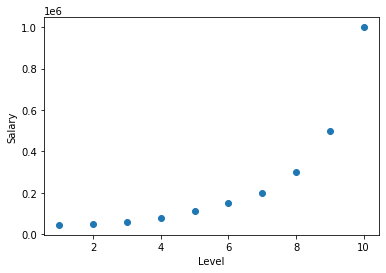

In [4]:
plt.scatter(df.Level, df.Salary)
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [13]:
x, y = np.array(df.Level).reshape(-1, 1), np.array(df.Salary).reshape(-1, 1)

In [15]:
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.reshape(-1,1),y.reshape(-1,1))

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

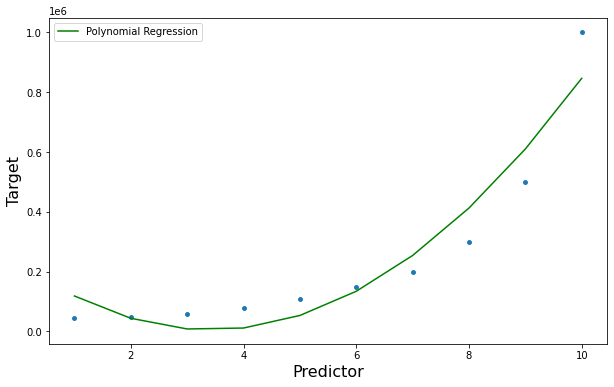

In [16]:
poly_pred=pipe.predict(x.reshape(-1,1))
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
plt.figure(figsize=(10,6))
plt.scatter(x,y,s=15)
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()

In [18]:
rmse = np.sqrt(mean_squared_error(y, poly_pred))
rmse

82212.12400451249